# Regression Model Test

## Imports

In [10]:
import tensorflow as tf
from tensorflow import keras
from loadData import createDataset
import matplotlib.pyplot as plt

In [11]:
model_path = '../../log/saved_models/mtm_regression_np/'
batch_size = 32
image_height = 160
image_width = 160

## Load the model

In [14]:
loaded_model = keras.models.load_model(model_path)

## Evaluating the test data

In [15]:
x, y_face, y_mask, y_age = createDataset('../../data/m3/test', (image_height, image_width), for_regression=True)

results = loaded_model.evaluate(
    x, 
    {
        'face_output' : y_face,
        'mask_output' : y_mask,
        'age_output' : y_age
})

print(f'Loss: {results[0]}; Accuracy: {results[1]}')

8/8 [==============================] - 5s 544ms/step - loss: 399.4389 - face_output_loss: 0.0898 - mask_output_loss: 0.1250 - age_output_loss: 1210.2061 - face_output_mean_absolute_error: 0.0898 - mask_output_mean_absolute_error: 0.1250 - age_output_mean_absolute_error: 21.7132
Loss: 399.4389343261719; Accuracy: 0.0898435115814209


## Predict new images

1/1 [==============================] - 1s 767ms/step


Text(0.5, 1.0, 'Face: 100.00% | Mask: 0.00% | Age: 41 (Actual: 14)')

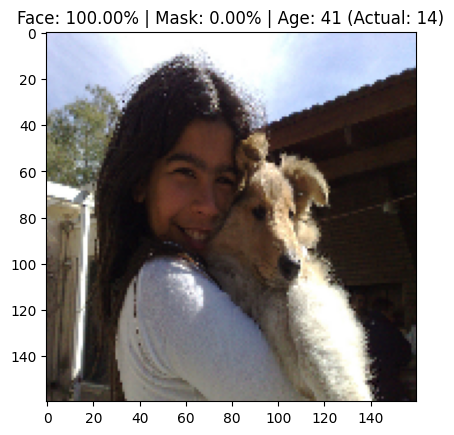

In [8]:
# Getting the image path for image to predict
img_path = '../../data/m3/test/face/noMask/1_0_14_200000.jpg'
img_path_split = img_path.split('/')
img_name = img_path_split[len(img_path_split)-1]
img_name_split = img_name.split('_')

# Getting the actual age from the file name
if(len(img_name_split) > 2 and str.isnumeric(img_name_split[2])):
    age_actual = img_name_split[2]
else:
    age_actual = '?'

# Loading and preprocessing the image
img = tf.keras.utils.load_img(
    img_path, target_size=(image_height, image_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array_batch = tf.expand_dims(img_array, 0) # Create a batch

# Let the model make a prediction for the image
preds = loaded_model.predict(img_array_batch)

# Getting face, mask and age prediction
face_pred_percent = preds[0][0][0]*100
mask_pred_percent = preds[1][0][0]*100
age_pred = int(preds[2][0][0])

if(age_pred > 120): age_pred = '-'

# Showing the image with the corresponding predictions
ax = plt.subplot(1, 1, 1)
plt.imshow(img)
plt.title("Face: {:.2f}% | Mask: {:.2f}% | Age: {} (Actual: {})".format(face_pred_percent, mask_pred_percent, age_pred, age_actual))